In [1]:
import cv2 as cv
from PIL import Image
import pytesseract

In [6]:
#use pillow for simple loading
#use openCV for more complex tasks

In [12]:
im_path = "page_01.jpg"
im = Image.open(im_path)
im.show()

OpenCv

In [3]:
# open an image
image_path = "page_01.jpg"
img = cv.imread(image_path)

In [33]:
import matplotlib.pyplot as plt  # Correct import for pyplot

def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)  # Read image data
    height, width, depth = im_data.shape  # Get image dimensions

    figsize = width / float(dpi), height / float(dpi)  # Calculate figure size

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])  # Add axes to the figure

    ax.axis('off')  # Hide axes

    ax.imshow(im_data, cmap='gray')  # Display image
    plt.show()  # Show the plot

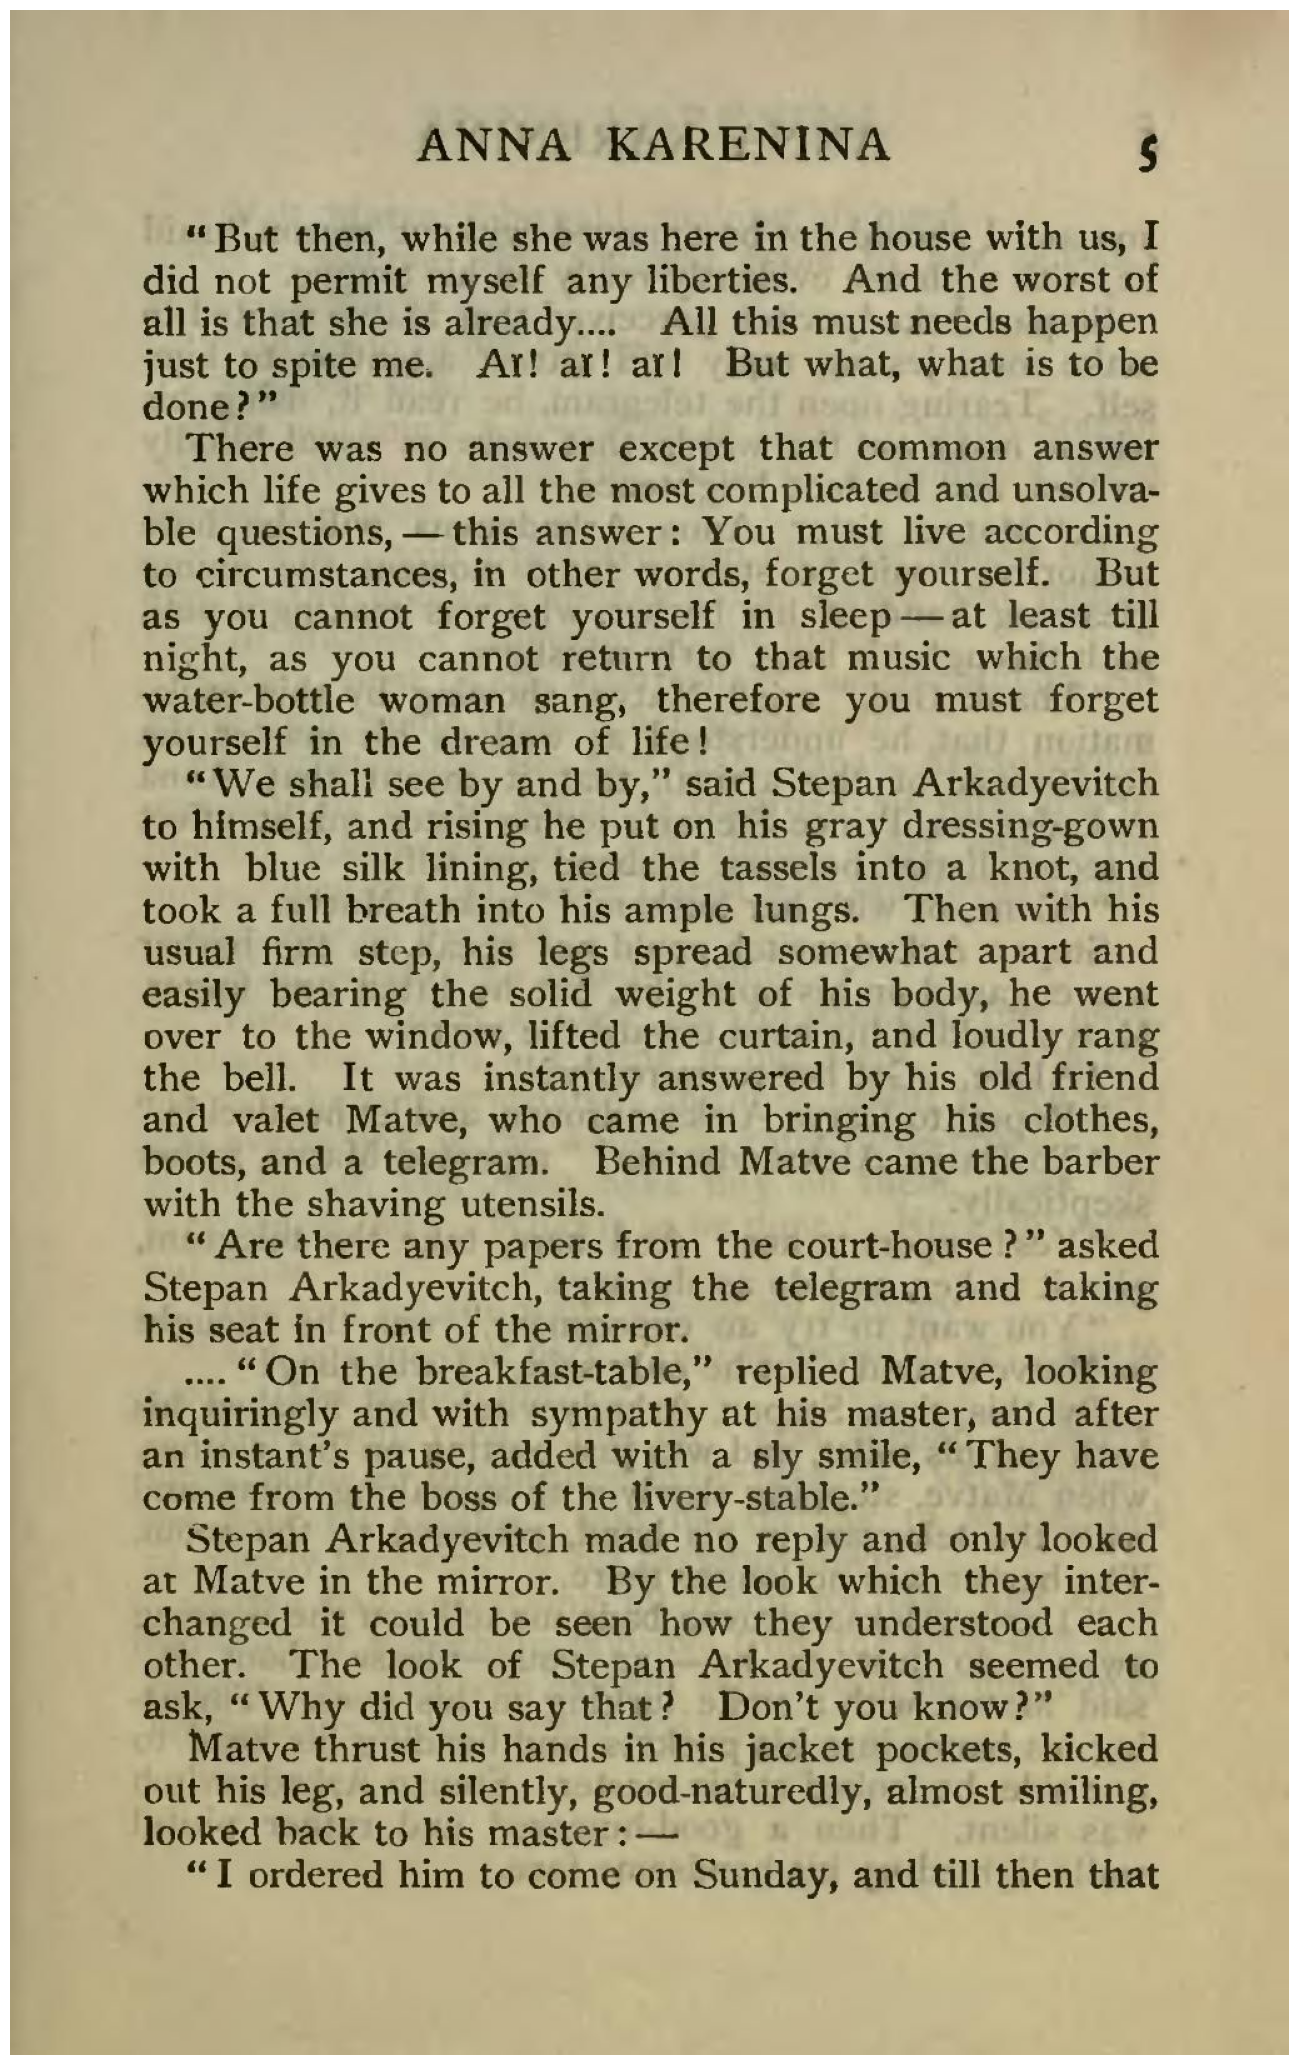

In [34]:
display("page_01.jpg")

In [22]:
# Inverted Images

inverted_image = cv.bitwise_not(img)
cv.imwrite("inverted.jpg", inverted_image)

True

In [27]:
# Binarization (B&W)

def grayscale(image):
    return cv.cvtColor(image, cv.COLOR_BGR2GRAY)

gray_image = grayscale(img)
cv.imwrite("gray.jpg", gray_image)

True

In [36]:
thresh, im_bw = cv.threshold(gray_image, 127, 255, cv.THRESH_BINARY)
cv.imwrite("bw_image.jpg",im_bw)

True

In [42]:
# Remove noise
import numpy as np
def noise_removal(image):
    kernel = np.ones((1, 1), np.uint8)

    image = cv.dilate(image, kernel, iterations = 1)

    kernel = np.ones((1, 1), np.uint8)
    image = cv.erode(image, kernel, iterations = 1)

    image = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)

    image = cv.medianBlur(image,3)
    
    return(image)

In [44]:
no_noise = noise_removal(im_bw)
cv.imwrite("no_noise.jpg", no_noise)

True